# Loan Prediction

This is my project to the ML competition from the site https://www.analyticsvidhya.com/ .

Understanding the problem statement is the first and foremost step. This would help you give an intuition of what you will face ahead of time. Let us see the problem statement -

**Dream Housing Finance company deals in all home loans. They have presence across all urban, semi urban and rural areas. Customer first apply for home loan after that company validates the customer eligibility for loan. Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers.**



It is a classification problem where we have to predict whether a loan would be approved or not. In a classification problem, we have to predict discrete values based on a given set of independent variable(s). Classification can be of two types:

**Binary Classification :** In this classification we have to predict either of the two given classes. For example: classifying the gender as male or female, predicting the result as win or loss, etc.

**Multiclass Classification :** Here we have to classify the data into three or more classes. For example: classifying a movie's genre as comedy, action or romantic, classify fruits as oranges, apples, or pears, etc.

Loan prediction is a very common real-life problem that each retail bank faces at least once in its lifetime. If done correctly, it can save a lot of man hours at the end of a retail bank.


# Hypothesis Generation

After looking at the problem statement, we will now move into hypothesis generation. It is the process of listing out all the possible factors that can affect the outcome.

## What is hypothesis generation?
This is a very important stage in any data science/machine learning pipeline. It involves understanding the problem in detail by brainstorming as many factors as possible which can impact the outcome. It is done by understanding the problem statement thoroughly and before looking at the data.

Below are some of the factors which I think can affect the Loan Approval (dependent variable for this loan prediction problem):

**Salary:** Applicants with high income should have more chances of loan approval.

**Previous history:** Applicants who have repayed their previous debts should have higher chances of loan approval.

**Loan amount:** Loan approval should also depend on the loan amount. If the loan amount is less, chances of loan approval should be high.

**Loan term:** Loan for less time period and less amount should have higher chances of approval.

**EMI:** Lesser the amount to be paid monthly to repay the loan, higher the chances of loan approval.

These are some of the factors which i think can affect the target variable, you can come up with many more factors.

You can download the dataset from: https://datahack.analyticsvidhya.com/contest/practice-problem-loan-prediction-iii/



## Loading Packages

In [1]:
import pandas as pd
import numpy as np                     # For mathematical calculations
import seaborn as sns                  # For data visualization
import matplotlib.pyplot as plt        # For plotting graphs
%matplotlib inline
import warnings                        # To ignore any warnings
warnings.filterwarnings("ignore")

## Data

Train file will be used for training the model, i.e. our model will learn from this file. It contains all the independent variables and the target variable.
Test file contains all the independent variables, but not the target variable. We will apply the model to predict the target variable for the test data.


## Reading data

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

The file name should be replaced with the name of the train and test file that you have downloaded from the datahack platform.

Let’s make a copy of train and test data so that even if we have to make any changes in these datasets we would not lose the original datasets.

In [3]:
train_original = train.copy()
test_original = test.copy()

we will look at the structure of the train and test datasets. Firstly, we will check the features present in our data and then we will look at their data types.

In [4]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

We have similar features in the test dataset as the train dataset except the Loan_Status. We will predict the Loan_Status using the model built using the train data.

Given below is the description for each variable:

<p align="justify">Variable	Description
Loan_ID	 = Unique Loan ID
Gender	= Male/ Female
Married	= Applicant married (Y/N)
Dependents	= Number of dependents
Education	= Applicant Education (Graduate/Under Graduate)
Self_Employed =	Self employed (Y/N)
ApplicantIncome =	Applicant income
CoapplicantIncome =	Coapplicant income
LoanAmount =	Loan amount in thousands
Loan_Amount_Term =	Term of loan in months
Credit_History =	Credit history meets guidelines
Property_Area =	Urban/ Semi Urban/ Rural
Loan_Status	= Loan approved (Y/N)<p align="justify">

In [13]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

We can see there are three format of data types:

**object:** Object format means variables are categorical. Categorical variables in our dataset are: Loan_ID, Gender, Married, Dependents, Education, Self_Employed, Property_Area, Loan_Status.

**int64:** It represents the integer variables. ApplicantIncome is in this format.

**float64**: It represents the variable which have some decimal values involved. They are also numerical variables. Numerical variables in our dataset are: CoapplicantIncome, LoanAmount, Loan_Amount_Term, and Credit_History.

Let’s look at the shape of the dataset.

In [14]:
train.shape, test.shape

((614, 13), (367, 12))

We have 614 rows and 13 columns in the train dataset and 367 rows and 12 columns in test dataset.

# Exploratory Data Analysis (EDA) and Data PreProcessing

## Univariate Analysis

In this section, we will do univariate analysis. It is the simplest form of analyzing data where we examine each variable individually. For categorical features we can use frequency table or bar plots which will calculate the number of each category in a particular variable. For numerical features, probability density plots can be used to look at the distribution of the variable.

## Target

We will first look at the target variable, i.e., Loan_Status. As it is a categorical variable, let us look at its frequency table, percentage distribution and bar plot.

Frequency table of a variable will give us the count of each category in that variable.

In [15]:
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [16]:
# Normalize can be set to True to print proportions instead of number 
train['Loan_Status'].value_counts(normalize = True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

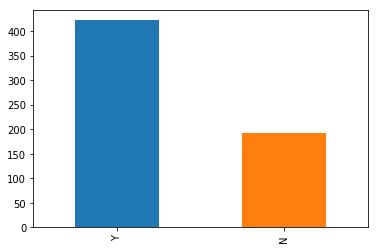

In [17]:
train['Loan_Status'].value_counts().plot.bar();

The loan of 422(around 69%) people out of 614 was approved.

Now lets visualize each variable separately. Different types of variables are Categorical, ordinal and numerical.

* Categorical features: These features have categories (Gender, Married, Self_Employed, Credit_History, Loan_Status)
* Ordinal features: Variables in categorical features having some order involved (Dependents, Education, Property_Area)
* Numerical features: These features have numerical values (ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term)

Let’s visualize the categorical and ordinal features first.

## Independent variable (Categorical)

In [18]:
# Creating a list of categorical variables.
categorical_variables = ['Gender', 'Married', 'Self_Employed', 'Credit_History', 'Loan_Status']
# Function to show all the categorical variables plots.
def categorical_features(df):
    for col in categorical_variables:
        plot_cat = train[col].value_counts(normalize=True).plot.bar(figsize=(10,5), title= col)
        plt.show(plot_cat)
 

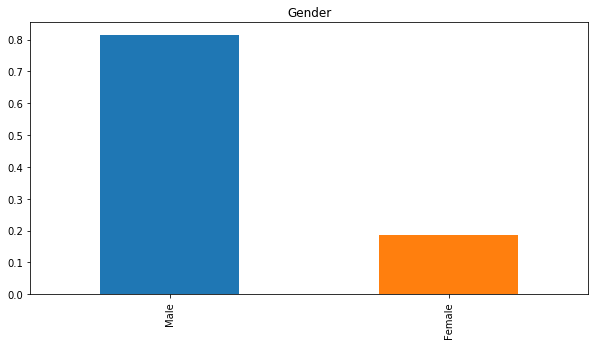

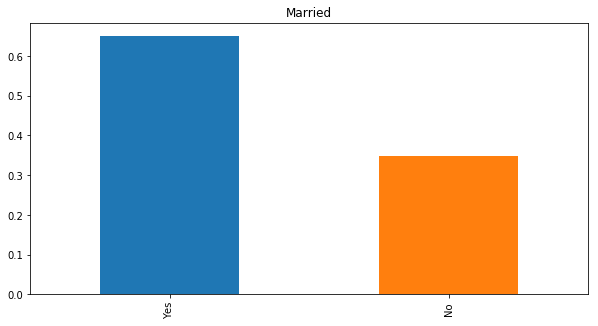

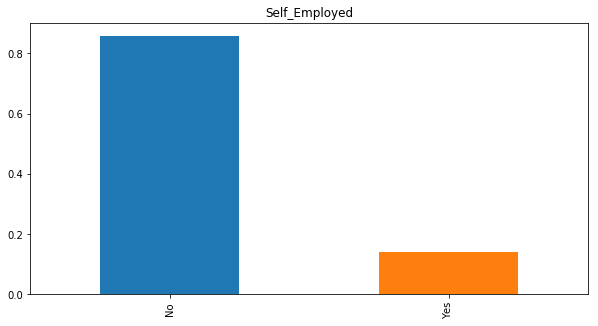

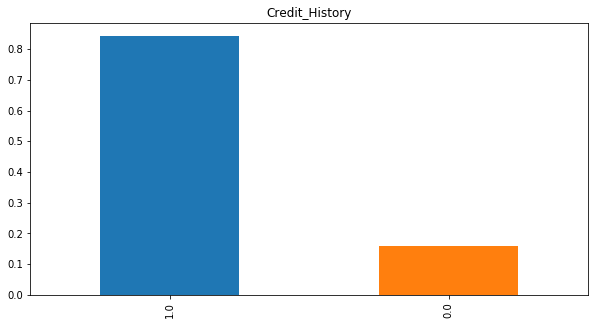

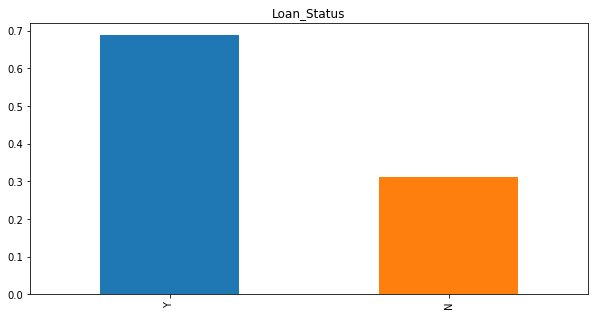

In [19]:
categorical_features(train)


It can be inferred from the above bar plots that:

* 80% applicants in the dataset are male.
* Around 65% of the applicants in the dataset are married.
* Around 15% applicants in the dataset are self employed.
* Around 85% applicants have repaid their debts.
Now let’s visualize the ordinal variables.

## Independet variable (Ordinal)

In [20]:
# Create a List of ordinal features:
ordinal_variables = ['Dependents', 'Education', 'Property_Area']
# Function to show all the ordinal variables plots.
def ordinal_features(df):
    for col in ordinal_variables:
        plot_ord = train[col].value_counts(normalize = True).plot.bar(figsize=(10,5), title= col)
        plt.show(plot_ord)
      
    

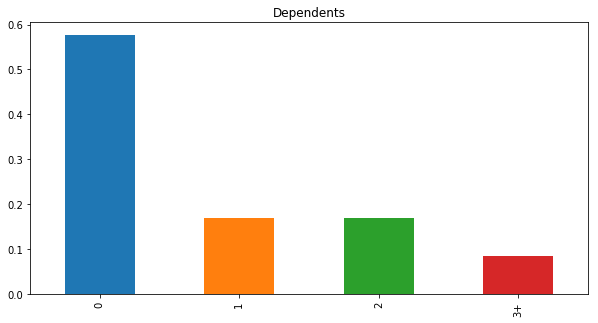

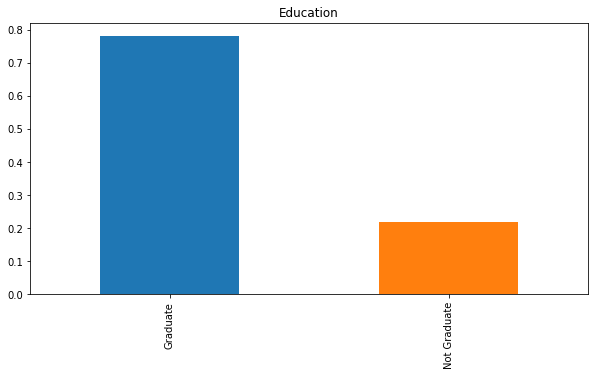

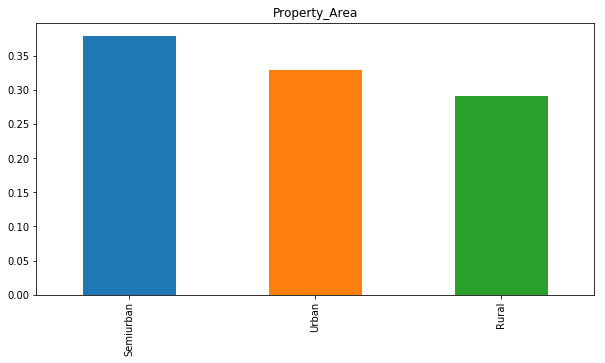

In [21]:
ordinal_features(train)

Following inferences can be made from the above bar plots:

* Most of the applicants don’t have any dependents.
* Around 80% of the applicants are Graduate.
* Most of the applicants are from Semiurban area.

## Independent variable (Numerical)

In [22]:
# Create a List of numeric features:
numeric_variables = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']
# Function to show all the numeric variables plots.
def numeric_features(df):
    for col in numeric_variables:
        plot_num = sns.distplot(df[col])
        plt.show(plot_num)

train_drop_na = train.dropna()
      

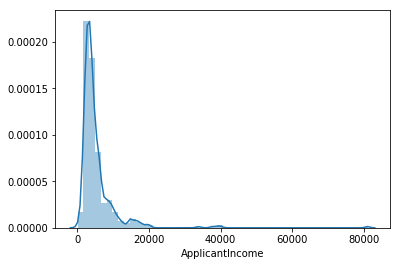

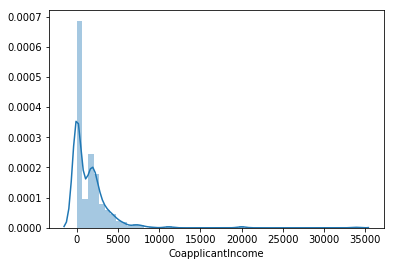

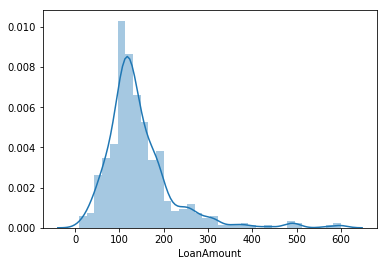

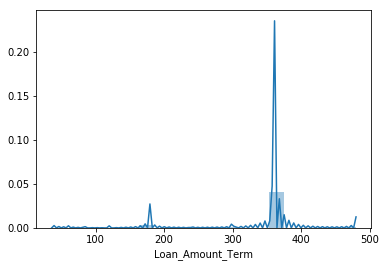

In [23]:
numeric_features(train_drop_na)

Lets recall some of the hypotheses that we generated earlier:

* Applicants with high income should have more chances of loan approval.
* Applicants who have repaid their previous debts should have higher chances of loan approval.
* Loan approval should also depend on the loan amount. If the loan amount is less, chances of loan approval should be high.
* Lesser the amount to be paid monthly to repay the loan, higher the chances of loan approval.
* Lets try to test the above mentioned hypotheses using bivariate analysis

After looking at every variable individually in univariate analysis, we will now explore them again with respect to the target variable.

## Categorical Independent Variable vs Target Variable

First of all we will find the relation between target variable and categorical independent variables. Let us look at the stacked bar plot now which will give us the proportion of approved and unapproved loans.

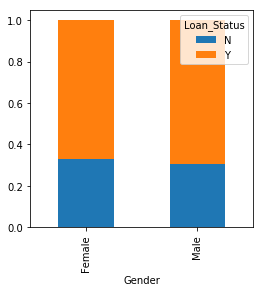

In [24]:
Gender=pd.crosstab(train['Gender'],train['Loan_Status'])
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4));

It can be inferred that the proportion of male and female applicants is more or less same for both approved and unapproved loans.

Now let us visualize the remaining categorical variables vs target variable.

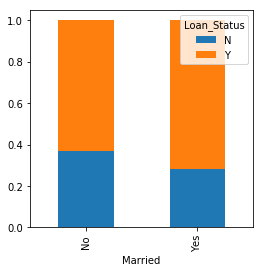

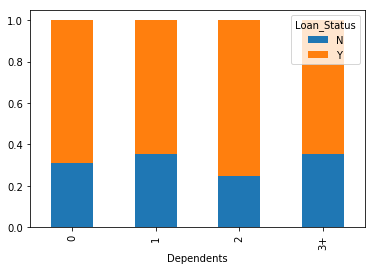

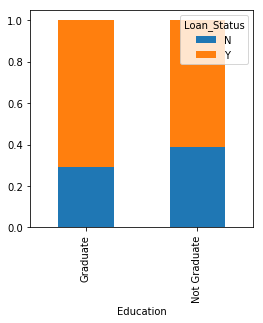

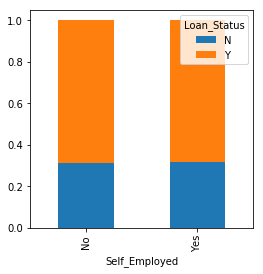

In [25]:
Married=pd.crosstab(train['Married'],train['Loan_Status'])
Dependents=pd.crosstab(train['Dependents'],train['Loan_Status'])
Education=pd.crosstab(train['Education'],train['Loan_Status'])
Self_Employed=pd.crosstab(train['Self_Employed'],train['Loan_Status'])

Married.div(Married.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show()

Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.show()

Education.div(Education.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show()

Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show()

Proportion of married applicants is higher for the approved loans.

* Distribution of applicants with 1 or 3+ dependents is similar across both the categories of Loan_Status.
* There is nothing significant we can infer from Self_Employed vs Loan_Status plot.

Now we will look at the relationship between remaining categorical independent variables and Loan_Status.

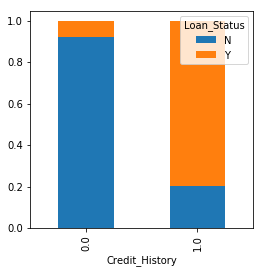

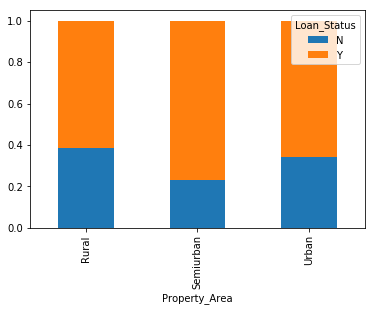

In [26]:
Credit_History=pd.crosstab(train['Credit_History'],train['Loan_Status'])
Property_Area=pd.crosstab(train['Property_Area'],train['Loan_Status'])

Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show()

Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.show()

* It seems people with credit history as 1 are more likely to get their loans approved.
* Proportion of loans getting approved in semiurban area is higher as compared to that in rural or urban areas.

Now let’s visualize numerical independent variables with respect to target variable.

## Numerical Independent Variable vs Target Variable

We will try to find the mean income of people for which the loan has been approved vs the mean income of people for which the loan has not been approved.

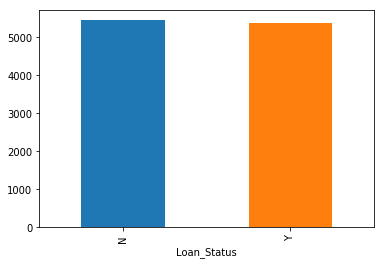

In [27]:
train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar();

Here the y-axis represents the mean applicant income. We don’t see any change in the mean income. So, let’s make bins for the applicant income variable based on the values in it and analyze the corresponding loan status for each bin.

In [28]:
bins=[0,2500,4000,6000,81000]
group=['Low','Average','High', 'Very high']
train['Income_bin']=pd.cut(train['ApplicantIncome'],bins,labels=group)

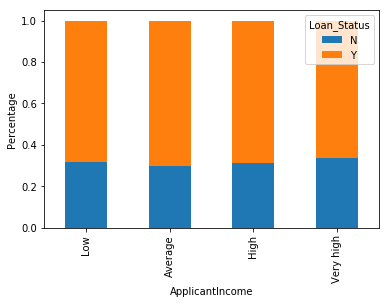

In [29]:
Income_bin=pd.crosstab(train['Income_bin'],train['Loan_Status'])
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('ApplicantIncome')
P = plt.ylabel('Percentage')

In [30]:
bins=[0,1000,3000,42000]
group=['Low','Average','High']
train['Coapplicant_Income_bin']=pd.cut(train['CoapplicantIncome'],bins,labels=group)

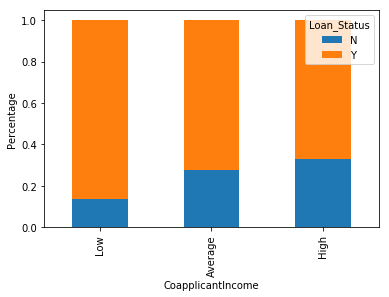

In [31]:
Coapplicant_Income_bin=pd.crosstab(train['Coapplicant_Income_bin'],train['Loan_Status'])
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('CoapplicantIncome')
P = plt.ylabel('Percentage')

It shows that if coapplicant’s income is less the chances of loan approval are high. But this does not look right. The possible reason behind this may be that most of the applicants don’t have any coapplicant so the coapplicant income for such applicants is 0 and hence the loan approval is not dependent on it. So we can make a new variable in which we will combine the applicant’s and coapplicant’s income to visualize the combined effect of income on loan approval.

Let us combine the Applicant Income and Coapplicant Income and see the combined effect of Total Income on the Loan_Status.

In [32]:
train['Total_Income'] = train['ApplicantIncome'] + train['CoapplicantIncome']

In [33]:
bins=[0,2500,4000,6000,81000]
group=['Low','Average','High', 'Very high']
train['Total_Income_bin']=pd.cut(train['Total_Income'],bins,labels=group)

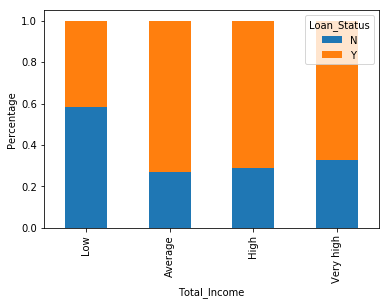

In [34]:
Total_Income_bin=pd.crosstab(train['Total_Income_bin'],train['Loan_Status'])
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('Total_Income')
P = plt.ylabel('Percentage')

We can see that Proportion of loans getting approved for applicants having low Total_Income is very less as compared to that of applicants with Average, High and Very High Income.

Let’s visualize the Loan amount variable.

In [35]:
bins=[0,100,200,700]
group=['Low','Average','High']
train['LoanAmount_bin']=pd.cut(train['LoanAmount'],bins,labels=group)

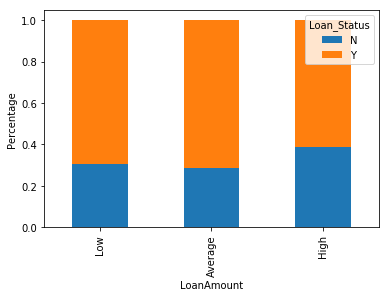

In [36]:
LoanAmount_bin=pd.crosstab(train['LoanAmount_bin'],train['Loan_Status'])
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('LoanAmount')
P = plt.ylabel('Percentage')


It can be seen that the proportion of approved loans is higher for Low and Average Loan Amount as compared to that of High Loan Amount which supports our hypothesis in which we considered that the chances of loan approval will be high when the loan amount is less.

Let’s drop the bins which we created for the exploration part. We will change the 3+ in dependents variable to 3 to make it a numerical variable.We will also convert the target variable’s categories into 0 and 1 so that we can find its correlation with numerical variables. One more reason to do so is few models like logistic regression takes only numeric values as input. We will replace N with 0 and Y with 1.

In [37]:
train=train.drop(['Income_bin', 'Coapplicant_Income_bin', 'LoanAmount_bin', 'Total_Income_bin', 'Total_Income'], axis=1)

In [38]:
train['Dependents'].replace('3+', 3,inplace=True)
test['Dependents'].replace('3+', 3,inplace=True)
train['Loan_Status'].replace('N', 0,inplace=True)
train['Loan_Status'].replace('Y', 1,inplace=True)

Now lets look at the correlation between all the numerical variables. We will use the heat map to visualize the correlation. Heatmaps visualize data through variations in coloring. The variables with darker color means their correlation is more.

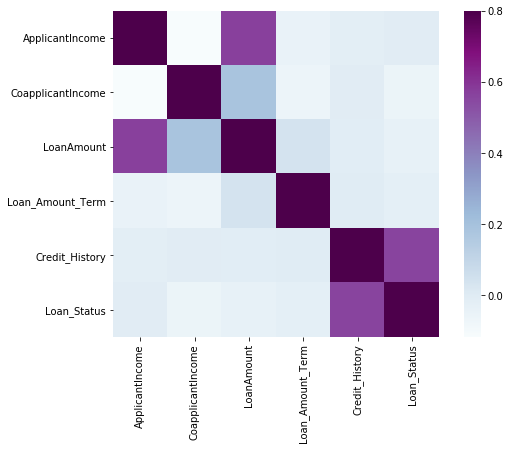

In [39]:
matrix = train.corr()
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(matrix, vmax=.8, square=True, cmap="BuPu");

We see that the most correlated variables are (ApplicantIncome - LoanAmount) and (Credit_History - Loan_Status). LoanAmount is also correlated with CoapplicantIncome.

After exploring all the variables in our data, we can now impute the missing values and treat the outliers because missing data and outliers can have adverse effect on the model performance.

## Missing value imputation

Let’s list out feature-wise count of missing values.

In [40]:
train.isnull().sum() 

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

There are missing values in Gender, Married, Dependents, Self_Employed, LoanAmount, Loan_Amount_Term and Credit_History features.

* **We will treat the missing values in all the features one by one.**

* **We can consider these methods to fill the missing values:**

**For numerical variables:** imputation using mean or median.

**For categorical variables:** imputation using mode.

There are very less missing values in Gender, Married, Dependents, Credit_History and Self_Employed features so we can fill them using the mode of the features.

In [41]:
# Create a function
cat_imp_list = ['Gender','Married','Dependents','Credit_History','Self_Employed']

def cat_imputation (df):
    for col in cat_imp_list:
        df[col].fillna(df[col].mode()[0],inplace=True)
    return     

cat_imputation(train)

In [42]:
# Result
train.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

Now let’s try to find a way to fill the missing values in Loan_Amount_Term. We will look at the value count of the Loan amount term variable.

In [43]:
train['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

It can be seen that in loan amount term variable, the value of 360 is repeating the most. So we will replace the missing values in this variable using the mode of this variable.

In [44]:
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0],inplace = True)

In [45]:
# Result
train.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

Now we will see the LoanAmount variable. As it is a numerical variable, we can use mean or median to impute the missing values. We will use median to fill the null values as earlier we saw that loan amount have outliers so the mean will not be the proper approach as it is highly affected by the presence of outliers.

In [46]:
train['LoanAmount'].fillna(train["LoanAmount"].median(),inplace = True)

In [47]:
# Result
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

As we can see that all the missing values have been filled in the train dataset. Let’s fill all the missing values in the test dataset too with the same approach.

In [48]:
test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [49]:
test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mode()[0],inplace = True)
test['LoanAmount'].fillna(test["LoanAmount"].median(),inplace = True)
test['Gender'].fillna(test['Gender'].mode()[0],inplace = True)
test['Dependents'].fillna(test["Dependents"].mode()[0],inplace = True)
test['Self_Employed'].fillna(test['Self_Employed'].mode()[0],inplace = True)
test['Credit_History'].fillna(test["Credit_History"].mode()[0],inplace = True)
test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

## Outilier Treatment

As we saw earlier in univariate analysis, LoanAmount contains outliers so we have to treat them as the presence of outliers affects the distribution of the data. Let's examine what can happen to a data set with outliers. For the sample data set:

1, 1, 2, 2, 2, 2, 3, 3, 3, 4, 4

We find the following: mean, median, mode, and standard deviation

Mean = 2.58

Median = 2.5

Mode = 2

Standard Deviation = 1.08

If we add an outlier to the data set:

1, 1, 2, 2, 2, 2, 3, 3, 3, 4, 4, 400

The new values of our statistics are:

Mean = 35.38

Median = 2.5

Mode = 2

Standard Deviation = 114.74

It can be seen that having outliers often has a significant effect on the mean and standard deviation and hence affecting the distribution. We must take steps to remove outliers from our data sets.

Due to these outliers bulk of the data in the loan amount is at the left and the right tail is longer. This is called right skewness. One way to remove the skewness is by doing the log transformation. As we take the log transformation, it does not affect the smaller values much, but reduces the larger values. So, we get a distribution similar to normal distribution.

Let’s visualize the effect of log transformation. We will do the similar changes to the test file simultaneously.

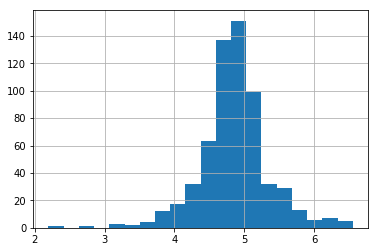

In [50]:
train['LoanAmount_log'] = np.log(train['LoanAmount'])
train['LoanAmount_log'].hist(bins=20)
test['LoanAmount_log'] = np.log(test['LoanAmount'])

Now the distribution looks much closer to normal and effect of extreme values has been significantly subsided. Let’s build a logistic regression model and make predictions for the test dataset.

Let us make our first model to predict the target variable. We will start with Logistic Regression which is used for predicting binary outcome.

* **Logistic Regression is a classification algorithm. It is used to predict a binary outcome (1 / 0, Yes / No, True / False) given a set of independent variables.**
* **Logistic regression is an estimation of Logit function. Logit function is simply a log of odds in favor of the event.**
* **This function creates a s-shaped curve with the probability estimate, which is very similar to the required step wise function
To learn further on logistic regression, refer this article: https://www.analyticsvidhya.com/blog/2015/10/basics-logistic-regression/**

Lets drop the Loan_ID variable as it do not have any effect on the loan status. We will do the same changes to the test dataset which we did for the training dataset.

In [51]:
train=train.drop('Loan_ID',axis=1)
test =test.drop('Loan_ID',axis = 1)

We will use scikit-learn (sklearn) for making different models which is an open source library for Python. It is one of the most efficient tool which contains many inbuilt functions that can be used for modeling in Python.

To learn further about sklearn, refer here: http://scikit-learn.org/stable/tutorial/index.html

Sklearn requires the target variable in a separate dataset. So, we will drop our target variable from the train dataset and save it in another dataset.

In [52]:
X = train.drop('Loan_Status',1)
Y = train.Loan_Status

Now we will make dummy variables for the categorical variables. Dummy variable turns categorical variables into a series of 0 and 1, making them lot easier to quantify and compare. Let us understand the process of dummies first:

* **Consider the “Gender” variable. It has two classes, Male and Female.**
* **As logistic regression takes only the numerical values as input, we have to change male and female into numerical value.**
* **Once we apply dummies to this variable, it will convert the “Gender” variable into two variables(Gender_Male and Gender_Female), one for each class, i.e. Male and Female.**
* **Gender_Male will have a value of 0 if the gender is Female and a value of 1 if the gender is Male.**

In [53]:
X = pd.get_dummies(X)
train = pd.get_dummies(train)
test = pd.get_dummies(test)

In [54]:
train.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Loan_Status', 'LoanAmount_log',
       'Gender_Female', 'Gender_Male', 'Married_No', 'Married_Yes',
       'Dependents_3', 'Dependents_0', 'Dependents_1', 'Dependents_2',
       'Education_Graduate', 'Education_Not Graduate', 'Self_Employed_No',
       'Self_Employed_Yes', 'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban'],
      dtype='object')

In [55]:
test.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'LoanAmount_log', 'Gender_Female',
       'Gender_Male', 'Married_No', 'Married_Yes', 'Dependents_3',
       'Dependents_0', 'Dependents_1', 'Dependents_2', 'Education_Graduate',
       'Education_Not Graduate', 'Self_Employed_No', 'Self_Employed_Yes',
       'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban'],
      dtype='object')

In [56]:
X.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'LoanAmount_log', 'Gender_Female',
       'Gender_Male', 'Married_No', 'Married_Yes', 'Dependents_3',
       'Dependents_0', 'Dependents_1', 'Dependents_2', 'Education_Graduate',
       'Education_Not Graduate', 'Self_Employed_No', 'Self_Employed_Yes',
       'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban'],
      dtype='object')

Now we will train the model on training dataset and make predictions for the test dataset. But can we validate these predictions? One way of doing this is we can divide our train dataset into two parts: train and validation. We can train the model on this train part and using that make predictions for the validation part. In this way we can validate our predictions as we have the true predictions for the validation part (which we do not have for the test dataset).

We will use the train_test_split function from sklearn to divide our train dataset. So, first let us import train_test_split.

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
X_train, x_cv, Y_train, y_cv = train_test_split(X, Y, test_size = 0.3)

The dataset has been divided into training and validation part. Let us import LogisticRegression and accuracy_score from sklearn and fit the logistic regression model.

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [60]:
model = LogisticRegression(random_state= 1)
model.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=1, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

Here the C parameter represents inverse of regularization strength. Regularization is applying a penalty to increasing the magnitude of parameter values in order to reduce overfitting. Smaller values of C specify stronger regularization. To learn about other parameters, refer here: http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

Let’s predict the Loan_Status for validation set and calculate its accuracy.

In [61]:
pred_cv = model.predict(x_cv)

Let us calculate how accurate our predictions are by calculating the accuracy.

In [62]:
accuracy_score(y_cv,pred_cv)

0.7783783783783784

So our predictions are almost 78% accurate, i.e. we have identified 78% of the loan status correctly.

Let’s make predictions for the test dataset.

In [63]:
pred_test = model.predict(test)

Lets import the submission file which we have to submit on the solution checker.

In [64]:
submission=pd.read_csv("Sample_Submission.csv")

We only need the Loan_ID and the corresponding Loan_Status for the final submission. we will fill these columns with the Loan_ID of test dataset and the predictions that we made, i.e., pred_test respectively.

In [65]:
submission['Loan_Status']=pred_test
submission['Loan_ID']=test_original['Loan_ID']

Remember we need predictions in Y and N. So let’s convert 1 and 0 to Y and N.

In [66]:
submission['Loan_Status'].replace(0, 'N',inplace=True)
submission['Loan_Status'].replace(1, 'Y',inplace=True)

Finally we will convert the submission to .csv format and make submission to check the accuracy on the leaderboard.

In [67]:
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('logistic.csv',index = False)

From this submission we got an accuracy of 0.777 on the leaderboard.

Instead of creating validation set, we can also make use of cross validation to validate our predictions. We will see this further.

# Logistic Regression using stratified k-folds cross validation

To check how robust our model is to unseen data, we can use Validation. It is a technique which involves reserving a particular sample of a dataset on which you do not train the model. Later, you test your model on this sample before finalizing it. Some of the common methods for validation are listed below:

* **The validation set approach**
* **k-fold cross validation**
* **Leave one out cross validation (LOOCV)**
* **Stratified k-fold cross validation**

Let's talk about stratified k-fold cross validation. Let us understand how it works:

* **Stratification is the process of rearranging the data so as to ensure that each fold is a good representative of the whole.**
* **For example, in a binary classification problem where each class comprises of 50% of the data, it is best to arrange the data such that in every fold, each class comprises of about half the instances.**
* **It is generally a better approach when dealing with both bias and variance.**
* **A randomly selected fold might not adequately represent the minor class, particularly in cases where there is a huge class imbalance.**

Let’s import StratifiedKFold from sklearn and fit the model.

In [68]:
from sklearn.model_selection import StratifiedKFold

Now let’s make a cross validation logistic model with stratified 5 folds and make predictions for test dataset.

In [69]:
i = 1

kf = StratifiedKFold(n_splits= 5, random_state= 1, shuffle= True)
for train_index, test_index in kf.split(X,Y):
    print('\n{} of kfold {}'.format(i, kf.n_splits))
    xtr, xvl = X.loc[train_index],X.loc[test_index]
    ytr, yvl = Y.loc[train_index],Y.loc[test_index]
    
    model = LogisticRegression(random_state= 1)
    model.fit(xtr, ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl,pred_test)
    print('accuracy_score', score)
    i += 1
pred_test_kfold = model.predict(test)
pred_kfold = model.predict(xvl)


1 of kfold 5
accuracy_score 0.7983870967741935

2 of kfold 5
accuracy_score 0.8306451612903226

3 of kfold 5
accuracy_score 0.8114754098360656

4 of kfold 5
accuracy_score 0.7950819672131147

5 of kfold 5
accuracy_score 0.8278688524590164


In [70]:
# Mean
pred_kfold.mean()

0.8442622950819673

The mean validation accuracy for this model turns out to be 0.84. Let us visualize the roc curve.

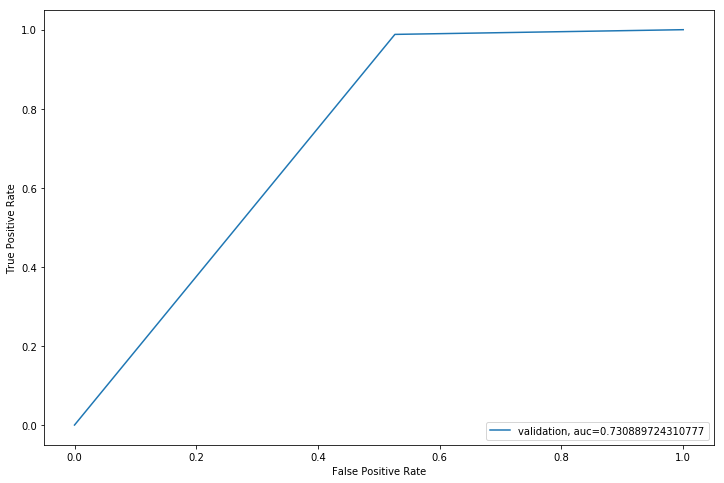

In [72]:
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(yvl,  pred_kfold)
auc = metrics.roc_auc_score(yvl, pred_kfold)
plt.figure(figsize=(12,8))
plt.plot(fpr,tpr,label="validation, auc="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

We got an auc value of 0.73

In [73]:
submission['Loan_Status']=pred_test_kfold
submission['Loan_ID']=test_original['Loan_ID']

Remember we need predictions in Y and N. So let’s convert 1 and 0 to Y and N.

In [74]:
submission['Loan_Status'].replace(0, 'N',inplace=True)
submission['Loan_Status'].replace(1, 'Y',inplace=True)

Lets convert the submission to .csv format and make submission to check the accuracy on the leaderboard.

In [75]:
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('LogisticKfold.csv', index = False)

In [76]:
accuracy_score(yvl,pred_kfold)

0.8278688524590164

From this submission we got an accuracy of 0.8278 on the leaderboard. Now we will try to improve this accuracy using different approaches.

# Feature Engineering

Based on the domain knowledge, we can come up with new features that might affect the target variable. We will create the following three new features:

* **Total Income** - As discussed during bivariate analysis we will combine the Applicant Income and Coapplicant Income. If the total income is high, chances of loan approval might also be high.
* **EMI** - EMI is the monthly amount to be paid by the applicant to repay the loan. Idea behind making this variable is that people who have high EMI’s might find it difficult to pay back the loan. We can calculate the EMI by taking the ratio of loan amount with respect to loan amount term.
* **Balance Income** - This is the income left after the EMI has been paid. Idea behind creating this variable is that if this value is high, the chances are high that a person will repay the loan and hence increasing the chances of loan approval.

In [77]:
train['Total_Income'] = train['ApplicantIncome'] + train['CoapplicantIncome']
test['Total_Income'] = test['ApplicantIncome'] + test['CoapplicantIncome']

Let’s check the distribution of Total Income.

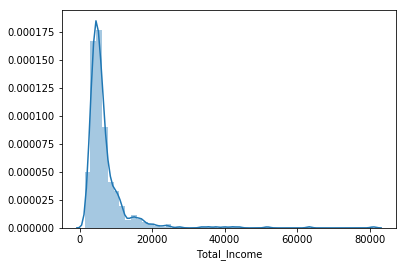

In [78]:
sns.distplot(train['Total_Income']);

We can see it is shifted towards left, i.e., the distribution is right skewed. So, let’s take the log transformation to make the distribution normal.

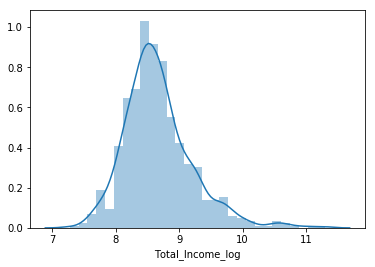

In [79]:
train['Total_Income_log'] = np.log(train['Total_Income'])
sns.distplot(train['Total_Income_log']);
test['Total_Income_log'] = np.log(test['Total_Income'])

Now the distribution looks much closer to normal and effect of extreme values has been significantly subsided. Let’s create the EMI feature now.

In [80]:
train['EMI'] = train['LoanAmount']/train['Loan_Amount_Term']
test['EMI'] = test['LoanAmount'] / test['Loan_Amount_Term']

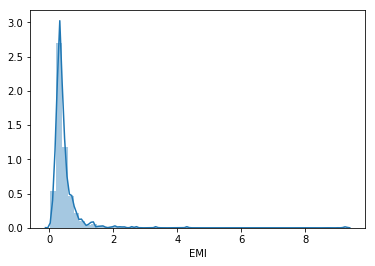

In [81]:
sns.distplot(train['EMI']);

Let us create Balance Income feature now and check its distribution.

In [82]:
train['Balance Income'] = train['Total_Income'] - (train['EMI']*1000) # Multiply with 1000 to make the units equal 
test['Balance Income'] = test['Total_Income'] - (test['EMI']* 1000)

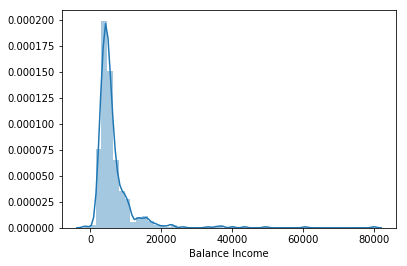

In [83]:
sns.distplot(train['Balance Income']);

Let us now drop the variables which we used to create these new features. Reason for doing this is, the correlation between those old features and these new features will be very high and logistic regression assumes that the variables are not highly correlated. We also wants to remove the noise from the dataset, so removing correlated features will help in reducing the noise too.

In [84]:
train = train.drop(['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term'], axis = 1)
test = test.drop(['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term'], axis = 1)

In [85]:
train.columns

Index(['Credit_History', 'Loan_Status', 'LoanAmount_log', 'Gender_Female',
       'Gender_Male', 'Married_No', 'Married_Yes', 'Dependents_3',
       'Dependents_0', 'Dependents_1', 'Dependents_2', 'Education_Graduate',
       'Education_Not Graduate', 'Self_Employed_No', 'Self_Employed_Yes',
       'Property_Area_Rural', 'Property_Area_Semiurban', 'Property_Area_Urban',
       'Total_Income', 'Total_Income_log', 'EMI', 'Balance Income'],
      dtype='object')

# Model Building : Part II

After creating new features, we can continue the model building process. So we will start with logistic regression model and then move over to more complex models like RandomForest and XGBoost.

We will build the following models:

* Logistic Regression
* Decision Tree
* Random Forest
* XGBoost

Let’s prepare the data for feeding into the models.

In [86]:
X = train.drop('Loan_Status',1)
y = train.Loan_Status                # Save target variable in separate dataset

## Logistic Regression

In [87]:
i = 1
kf = StratifiedKFold(n_splits= 5, random_state = 1, shuffle= True)
for train_index, test_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i, kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y.loc[train_index],y.loc[test_index]
    
    model = LogisticRegression(random_state= 1)
    model.fit(xtr, ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl,pred_test)
    print('accuracy_score',score)
    i += 1

pred_test_log = model.predict(test)
pred_log = model.predict(xvl)


1 of kfold 5
accuracy_score 0.8064516129032258

2 of kfold 5
accuracy_score 0.8225806451612904

3 of kfold 5
accuracy_score 0.7786885245901639

4 of kfold 5
accuracy_score 0.7868852459016393

5 of kfold 5
accuracy_score 0.819672131147541


In [88]:
pred_test_log.mean()

0.8664850136239782

The mean validation accuracy for this model is 0.866

In [89]:
submission['Loan_Status']=pred_test_log            # filling Loan_Status with predictions
submission['Loan_ID']=test_original['Loan_ID'] # filling Loan_ID with test Loan_ID

In [90]:
# replacing 0 and 1 with N and Y
submission['Loan_Status'].replace(0, 'N',inplace=True)
submission['Loan_Status'].replace(1, 'Y',inplace=True)

In [91]:
# Converting submission file to .csv format
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('Log2.csv',index = False)

From this submission we got an accuracy of 0.76 on the leaderboard. So we can infer feature engineering has not improved the model. Let us look at some other algorithms.

## Decision Tree

Decision tree is a type of supervised learning algorithm(having a pre-defined target variable) that is mostly used in classification problems. In this technique, we split the population or sample into two or more homogeneous sets(or sub-populations) based on most significant splitter / differentiator in input variables.

Decision trees use multiple algorithms to decide to split a node in two or more sub-nodes. The creation of sub-nodes increases the homogeneity of resultant sub-nodes. In other words, we can say that purity of the node increases with respect to the target variable.

In [92]:
from sklearn import tree

Let’s fit the decision tree model with 5 folds of cross validation.

In [93]:
i = 1
kf = StratifiedKFold(n_splits= 5, random_state = 1, shuffle= True)
for train_index, test_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i, kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y.loc[train_index],y.loc[test_index]
    
    model = tree.DecisionTreeClassifier(random_state= 1)
    model.fit(xtr, ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl,pred_test)
    print('accuracy_score',score)
    i += 1

pred_test_tree = model.predict(test)
pred_tree = model.predict(xvl)


1 of kfold 5
accuracy_score 0.7258064516129032

2 of kfold 5
accuracy_score 0.7419354838709677

3 of kfold 5
accuracy_score 0.7049180327868853

4 of kfold 5
accuracy_score 0.680327868852459

5 of kfold 5
accuracy_score 0.7049180327868853


In [94]:
pred_test_tree.mean()

0.6730245231607629

The mean validation accuracy for this model is 0.67

In [95]:
submission['Loan_Status']=pred_test_tree            # filling Loan_Status with predictions
submission['Loan_ID']=test_original['Loan_ID'] # filling Loan_ID with test Loan_ID

In [96]:
# replacing 0 and 1 with N and Y
submission['Loan_Status'].replace(0, 'N',inplace=True)
submission['Loan_Status'].replace(1, 'Y',inplace=True)

In [97]:
# Converting submission file to .csv format
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('Decision Tree.csv',index = False)

From this submission we got an accuracy of 0.6458 on the leaderboard

## Random Forest

* **RandomForest is a tree based bootstrapping algorithm wherein a certain no. of weak learners (decision trees) are combined to make a powerful prediction model.**
* **For every individual learner, a random sample of rows and a few randomly chosen variables are used to build a decision tree model.**
* **Final prediction can be a function of all the predictions made by the individual learners.**
* **In case of regression problem, the final prediction can be mean of all the predictions.**

In [98]:
from sklearn.ensemble import RandomForestClassifier

In [99]:
i = 1
kf = StratifiedKFold(n_splits= 5, random_state = 1, shuffle= True)
for train_index, test_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i, kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y.loc[train_index],y.loc[test_index]
    
    model = RandomForestClassifier(random_state= 1,max_depth= 10)
    model.fit(xtr, ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl,pred_test)
    print('accuracy_score',score)
    i += 1

pred_test_random = model.predict(test)
pred_random = model.predict(xvl)


1 of kfold 5
accuracy_score 0.8225806451612904

2 of kfold 5
accuracy_score 0.8145161290322581

3 of kfold 5
accuracy_score 0.7377049180327869

4 of kfold 5
accuracy_score 0.7295081967213115

5 of kfold 5
accuracy_score 0.8114754098360656


In [100]:
pred_test_random.mean()

0.776566757493188

The mean validation accuracy for this model is 0.77

We will try to improve the accuracy by tuning the hyperparameters for this model. We will use grid search to get the optimized values of hyper parameters. Grid-search is a way to select the best of a family of hyper parameters, parametrized by a grid of parameters.

We will tune the max_depth and n_estimators parameters. max_depth decides the maximum depth of the tree and n_estimators decides the number of trees that will be used in random forest model.

In [101]:
from sklearn.model_selection import GridSearchCV

In [102]:
# Provide range for max_depth from 1 to 20 with an interval of 2 and from 1 to 200 with an interval of 20 for n_estimators
paramgrid = {'max_depth': list(range(1, 20, 2)), 'n_estimators': list(range(1, 200, 20))}

In [103]:
grid_search=GridSearchCV(RandomForestClassifier(random_state=1),paramgrid)

In [104]:
from sklearn.model_selection import train_test_split
x_train, x_cv, y_train, y_cv = train_test_split(X,y, test_size =0.3, random_state=1)

In [105]:
# Fit the grid search model
grid_search.fit(x_train,y_train)

C:\Users\CWILLIAN\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=1, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19], 'n_estimators': [1, 21, 41, 61, 81, 101, 121, 141, 161, 181]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [106]:
# Estimating the optimized value
grid_search.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=141, n_jobs=None,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

So, the optimized value for the max_depth variable is 3 and for n_estimator is 141. Now let’s build the model using these optimized values.

In [107]:
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
     print('\n{} of kfold {}'.format(i,kf.n_splits))
     xtr,xvl = X.loc[train_index],X.loc[test_index]
     ytr,yvl = y[train_index],y[test_index]
    
     model = RandomForestClassifier(random_state=1, max_depth=3, n_estimators=141)
     model.fit(xtr, ytr)
     pred_test = model.predict(xvl)
     score = accuracy_score(yvl,pred_test)
     print('accuracy_score',score)
     i+=1
pred_test_randomforest = model.predict(test)
pred_randomforest=model.predict_proba(test)[:,1]


1 of kfold 5
accuracy_score 0.8064516129032258

2 of kfold 5
accuracy_score 0.8306451612903226

3 of kfold 5
accuracy_score 0.8032786885245902

4 of kfold 5
accuracy_score 0.7950819672131147

5 of kfold 5
accuracy_score 0.8278688524590164


In [108]:
pred_test_randomforest.mean()

0.8283378746594006

In [109]:
submission['Loan_Status']=pred_test_randomforest            # filling Loan_Status with predictions
submission['Loan_ID']=test_original['Loan_ID'] # filling Loan_ID with test Loan_ID
# replacing 0 and 1 with N and Y
submission['Loan_Status'].replace(0, 'N',inplace=True)
submission['Loan_Status'].replace(1, 'Y',inplace=True)
# Converting submission file to .csv format
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('Random Forest.csv',index = False)

From this submission we got an accuracy of 0.7638 on the leaderboard

Let us find the feature importance now, i.e. which features are most important for this problem. We will use feature_importances_ attribute of sklearn to do so.

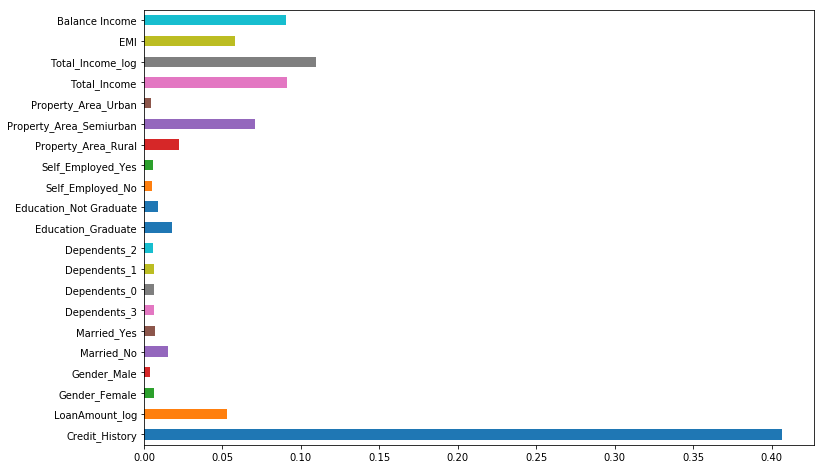

In [110]:
importances = pd.Series(model.feature_importances_, index = X.columns)
importances.plot(kind = 'barh',figsize = (12,8));

We can see that Credit_History is the most important feature followed by Balance Income, Total Income, EMI. So, feature engineering helped us in predicting our target variable.

# XGboost

XGBoost is a fast and efficient algorithm and has been used to by the winners of many data science competitions.
XGBoost works only with numeric variables and we have already replaced the categorical variables with numeric variables. Let’s have a look at the parameters that we are going to use in our model.

* **n_estimator: This specifies the number of trees for the model.**
* **max_depth: We can specify maximum depth of a tree using this parameter**.

In [111]:
from xgboost.sklearn import XGBClassifier

In [142]:
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
     print('\n{} of kfold {}'.format(i,kf.n_splits))
     xtr,xvl = X.loc[train_index],X.loc[test_index]
     ytr,yvl = y[train_index],y[test_index]
    
     model = XGBClassifier(n_estimators=10, max_depth=4)
     model.fit(xtr, ytr)
     pred_test = model.predict(xvl)
     score = accuracy_score(yvl,pred_test)
     print('accuracy_score',score)
     i+=1
pred_test_xgboost = model.predict(test)
pred_xgboost=model.predict_proba(test)[:,1]


1 of kfold 5
accuracy_score 0.7903225806451613

2 of kfold 5
accuracy_score 0.8306451612903226

3 of kfold 5
accuracy_score 0.7622950819672131

4 of kfold 5
accuracy_score 0.7868852459016393

5 of kfold 5
accuracy_score 0.8278688524590164


In [143]:
pred_test_xgboost.mean()

0.8555858310626703

The mean validation accuracy for this model is 0.85.

In [144]:
submission['Loan_Status']=pred_test_xgboost
submission['Loan_ID']=test_original['Loan_ID']
submission['Loan_Status'].replace(0, 'N',inplace=True)
submission['Loan_Status'].replace(1, 'Y',inplace=True)
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('XGBoost.csv',index = False)

# What more can be tried?

There are still quite a many things that can be tried to improve our models’ predictions. We create and add more variables, try different models with different subset of features and/or rows, etc. Some of the ideas are listed below:

We can train the XGBoost model using grid search to optimize its hyperparameters and improve the accuracy.
We can combine the applicants with 1,2,3 or more dependents and make a new feature as discussed in the EDA part.
We can also make independent vs independent variable visualizations to discover some more patterns.
We can also arrive at the EMI using a better formula which may include interest rates as well.
We can even try ensemble modeling (combination of different models).